In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [3]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

In [4]:
from sklearn import svm

In [5]:
#validation
#use randomized search cross validation for hyperparameter tunning
from sklearn .model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [6]:
df=pd.read_csv('/content/breast-cancer-wisconsin.data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [7]:
df=df.replace('?', np.nan)
df_drop_column=df.dropna(axis=0)
print(df_drop_column.isna().sum())

1000025    0
5          0
1          0
1.1        0
1.2        0
2          0
1.3        0
3          0
1.4        0
1.5        0
2.1        0
dtype: int64


In [8]:
df = df_drop_column.values.tolist()

In [9]:
column_name=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
feature=['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']

In [10]:
#split data & split data by scaled one and not sclaed one

In [11]:
df=pd.DataFrame(df,columns=column_name)
df=df.drop(['Sample code number'],axis=1)
#make object to int
df=df.astype(int)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              682 non-null    int64
 1   Uniformity of Cell Size      682 non-null    int64
 2   Uniformity of Cell Shape     682 non-null    int64
 3   Marginal Adhesion            682 non-null    int64
 4   Single Epithelial Cell Size  682 non-null    int64
 5   Bare Nuclei                  682 non-null    int64
 6   Bland Chromatin              682 non-null    int64
 7   Normal Nucleoli              682 non-null    int64
 8   Mitoses                      682 non-null    int64
 9   Class                        682 non-null    int64
dtypes: int64(10)
memory usage: 53.4 KB


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...
677,3,1,1,1,3,2,1,1,1,2
678,2,1,1,1,2,1,1,1,1,2
679,5,10,10,3,7,3,8,10,2,4
680,4,8,6,4,3,4,10,6,1,4


In [12]:
X=df.drop('Class',axis=1)
Y=pd.DataFrame.copy(df['Class'])

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)
print(X_scaled)

            0         1         2         3         4         5         6  \
0    0.198055  0.276120  0.261609  0.756767  1.693494  1.771179 -0.181965   
1   -0.510993 -0.702981 -0.742617 -0.640026 -0.556142 -0.425083 -0.181965   
2    0.552580  1.581587  1.600577 -0.640026 -0.106214  0.123983 -0.181965   
3   -0.156469 -0.702981 -0.742617  0.058370 -0.556142 -0.699616 -0.181965   
4    1.261629  2.234321  2.270061  1.804361  1.693494  1.771179  2.267377   
..        ...       ...       ...       ...       ...       ...       ...   
677 -0.510993 -0.702981 -0.742617 -0.640026 -0.106214 -0.425083 -0.998412   
678 -0.865518 -0.702981 -0.742617 -0.640026 -0.556142 -0.699616 -0.998412   
679  0.198055  2.234321  2.270061  0.058370  1.693494 -0.150550  1.859154   
680 -0.156469  1.581587  0.931093  0.407569 -0.106214  0.123983  2.675601   
681 -0.156469  1.581587  1.600577  0.756767  0.343713  0.398515  2.675601   

            7         8  
0   -0.285873 -0.348686  
1   -0.613546 -0.348686

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
x_scaled_train, x_scaled_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=10)

In [15]:
target_name=np.array(['benign','malignant'])

In [45]:
def giantFunction(scaledData,notScaledData):
    def testScore(model, x_test):
        score=model.score(x_test,y_test)
        return score

    def makeTree(model):
        export_graphviz(model,out_file='tree.dot',feature_names=feature,
                    class_names=target_name,filled=True)
        with open('tree.dot') as f:
           graph = f.read()
        return graphviz.Source(graph)

    def decisionTreeGini(x_train,y_train):
        model=DecisionTreeClassifier(criterion='gini')
        model.fit(x_train,y_train)
        return model

    def decisionTreeEntropy(x_train,y_train):
        model=DecisionTreeClassifier(criterion='entropy')
        model.fit(x_train,y_train)
        return model

    def logisticReg(x_train,y_train):
        model=LogisticRegression()
        model.fit(x_train,y_train)
        return model

    def supportvecterLinear(x_train,y_train):
        model=svm.SVC(kernel='linear')
        model.fit(x_train,y_train)
        return model

    def supportvecterRbf(x_train,y_train):
        model=svm.SVC(kernel='rbf')
        model.fit(x_train,y_train)
        return model

    def decisionTreeHyperParameterTunning(x_train):
        dt = DecisionTreeClassifier()
        param_grid = {
        'max_depth': [2,3,4,5,6,7,8],
        'max_leaf_nodes': [3, 5, 7, 9, 10,15,20],
        'criterion':['entropy', 'gini']
       }
        n_iter = 15
        random_search = RandomizedSearchCV(dt,
                                      param_distributions = param_grid,
                                      n_iter = n_iter,
                                      cv = 5,
                                      random_state = 3)
        random_search.fit(x_train, y_train)
        return random_search

    def logisticRegressionHyperParameterTunning(x_train):
        logisticRegressionModel = LogisticRegression()
        param_grid = {
           'C': [0.001, 0.01, 0.1, 1, 10, 100]
       }
        grid_search = GridSearchCV(logisticRegressionModel,
                                     param_grid = param_grid,
                                      cv = 5)
        grid_search.fit(x_train, y_train)
        return grid_search

    def svmHyperParameterTunning(x_train):
        svmTunning = svm.SVC()
        param_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'gamma': [1, 0.1, 0.01, 0.001]
        }
        n_iter = 10
        random_search = RandomizedSearchCV(svmTunning,
                                      param_distributions = param_grid,
                                      n_iter = n_iter,
                                      cv = 5,
                                      random_state = 3)
        random_search.fit(x_train, y_train)
        return random_search

    dtModelGini = decisionTreeGini(x_train,y_train)
    dtModelGiniScaled = decisionTreeGini(x_scaled_train,y_train)
    print("Score of decision Tree use Gini is",testScore(dtModelGini, x_test))
    print("Score of decision Tree use Gini and scaled data is",testScore(dtModelGiniScaled, x_scaled_test))
    print()

    dtModelEntropy = decisionTreeEntropy(x_train, y_train)
    dtModelEntropyScaled = decisionTreeEntropy(x_scaled_train, y_train)
    print("Score of decision Tree use Entropy is",testScore(dtModelEntropy, x_test))
    print("Score of decision Tree use Entropy and scaled data is",testScore(dtModelEntropyScaled, x_scaled_test))
    print()

    logisticRegressionModel = logisticReg(x_train, y_train)
    logisticRegressionModelScaled = logisticReg(x_scaled_train, y_train)
    print("Score of logistic regression is",testScore(logisticRegressionModel, x_test))
    print("Score of logistic regression with scaled data is",testScore(logisticRegressionModelScaled, x_scaled_test))
    print()


    svmLinear = supportvecterLinear(x_train,y_train)
    svmLinearScaled = supportvecterLinear(x_scaled_train,y_train)
    print("Score of svm with linear is",testScore(svmLinear, x_test))
    print("Score of svm with linear and scaled data is",testScore(svmLinearScaled, x_scaled_test))
    print()

    svmRBF = supportvecterRbf(x_train,y_train)
    svmRBFScaled = supportvecterRbf(x_scaled_train,y_train)
    print("Score of svm with RBF is",testScore(svmRBF, x_test))
    print("Score of svm with RBF and scaled data is",testScore(svmRBFScaled, x_scaled_test))
    print()


    #decision tree hyperparameter tunning
    dtModel = decisionTreeHyperParameterTunning(x_train)
    print('best parameters of decision tree : ', dtModel.best_params_)
    bestModel = dtModel.best_estimator_
    print('best_score of decisionTree tree: ', testScore(bestModel, x_test))
    print()

    #decision tree hyperparameter tunning with scaled data
    dtModelScaled = decisionTreeHyperParameterTunning(x_scaled_train)
    print('best parameters of decision tree with scaled data: ', dtModelScaled.best_params_)
    bestModelScaled = dtModelScaled.best_estimator_
    print('best_score of decisionTree with scaled data: ', testScore(bestModelScaled, x_scaled_test))
    print()

    print('best decision tree')
    bestDecision=DecisionTreeClassifier(max_leaf_nodes=dtModel.best_params_['max_leaf_nodes'],max_depth=dtModel.best_params_['max_depth'],criterion=dtModel.best_params_['criterion'])
    bestDecision.fit(x_train,y_train)
    display(makeTree(bestDecision))
    print()

    print('best decision tree with scaled data')
    bestDecisionScaled=DecisionTreeClassifier(max_leaf_nodes=dtModelScaled.best_params_['max_leaf_nodes'],max_depth=dtModelScaled.best_params_['max_depth'],criterion=dtModelScaled.best_params_['criterion'])
    bestDecisionScaled.fit(x_train,y_train)
    display(makeTree(bestDecisionScaled))

    #logistic regression hyperparameter tunning
    logisticRegressionModel = logisticRegressionHyperParameterTunning(x_train)
    print('best parameters of logistic regression : ', logisticRegressionModel.best_params_)
    bestModel = logisticRegressionModel.best_estimator_
    print('best_score of logistic regression : ', testScore(bestModel, x_test))
    print()
    #logistic regression hyperparameter tunning with scled data
    logisticRegressionModelScaled = logisticRegressionHyperParameterTunning(x_scaled_train)
    print('best parameters of logistic regression with scaled data: ', logisticRegressionModelScaled.best_params_)
    bestModelScaled = logisticRegressionModelScaled.best_estimator_
    print('best_score of logistic regression : ', testScore(bestModelScaled, x_scaled_test))
    print()


    #svm hyperparameter tunning
    svmTunning1 = svmHyperParameterTunning(x_train)
    print('best parameters of svm : ', svmTunning1.best_params_)
    bestModel = svmTunning1.best_estimator_
    print('best_score of svm :', testScore(bestModel, x_test))
    print()
    #svm with scaled data hyperparameter tunning
    svmTunningScaled = svmHyperParameterTunning(x_scaled_train)
    print('best parameters of svm with scaled data : ', svmTunningScaled.best_params_)
    bestModelScaled = svmTunningScaled.best_estimator_
    print('best_score of svm with scaled data:', testScore(bestModelScaled, x_scaled_test))
    return 



      
    

Score of decision Tree use Gini is 0.9365853658536586
Score of decision Tree use Gini and scaled data is 0.9512195121951219

Score of decision Tree use Entropy is 0.9609756097560975
Score of decision Tree use Entropy and scaled data is 0.9560975609756097

Score of logistic regression is 0.975609756097561
Score of logistic regression with scaled data is 0.975609756097561

Score of svm with linear is 0.9804878048780488
Score of svm with linear and scaled data is 0.9804878048780488

Score of svm with RBF is 0.9804878048780488
Score of svm with RBF and scaled data is 0.9804878048780488

best parameters of decision tree :  {'max_leaf_nodes': 5, 'max_depth': 5, 'criterion': 'gini'}
best_score of decisionTree tree:  0.9414634146341463

best parameters of decision tree with scaled data:  {'max_leaf_nodes': 7, 'max_depth': 3, 'criterion': 'gini'}
best_score of decisionTree with scaled data:  0.9560975609756097

best decision tree


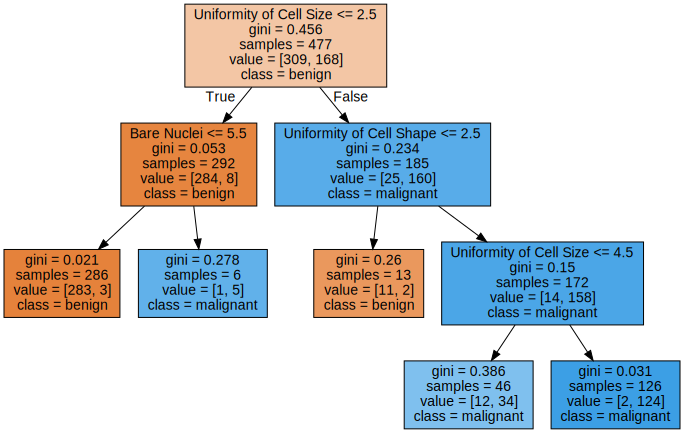


best decision tree with scaled data


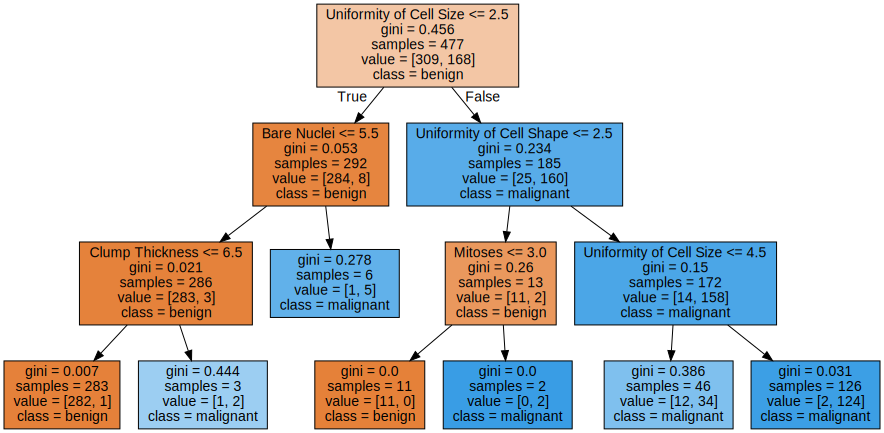

best parameters of logistic regression :  {'C': 0.1}
best_score of logistic regression :  0.975609756097561

best parameters of logistic regression with scaled data:  {'C': 1}
best_score of logistic regression :  0.975609756097561

best parameters of svm :  {'gamma': 0.001, 'C': 1}
best_score of svm : 0.975609756097561

best parameters of svm with scaled data :  {'gamma': 0.01, 'C': 1}
best_score of svm with scaled data: 0.975609756097561


In [46]:
giantFunction(x_train,x_scaled_test)